# Lesson 02: Fill Missing Values With Imputation
by Jason Brownlee on June 29, 2020 in [Data Preparation](https://machinelearningmastery.com/data-preparation-for-machine-learning-7-day-mini-course/)


In this lesson, you will discover how to identify and fill missing values in data.

Real-world data often has missing values.

Data can have missing values for a number of reasons, such as observations that were not recorded and data corruption. Handling missing data is important as many machine learning algorithms do not support data with missing values.

Filling missing values with data is called data imputation and a popular approach for data imputation is to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the statistic.

The horse colic dataset describes medical characteristics of horses with colic and whether they lived or died. It has missing values marked with a question mark ‘?’. We can load the dataset with the read_csv() function and ensure that question mark values are marked as NaN.

Once loaded, we can use the [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class to transform all missing values marked with a NaN value with the mean of the column.

The complete example is listed below.

In [35]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
from pylab import rcParams

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# load dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
datafile = '.\\data\\horse-colic.csv'
dataframe = read_csv(datafile, header=None, na_values='?')
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


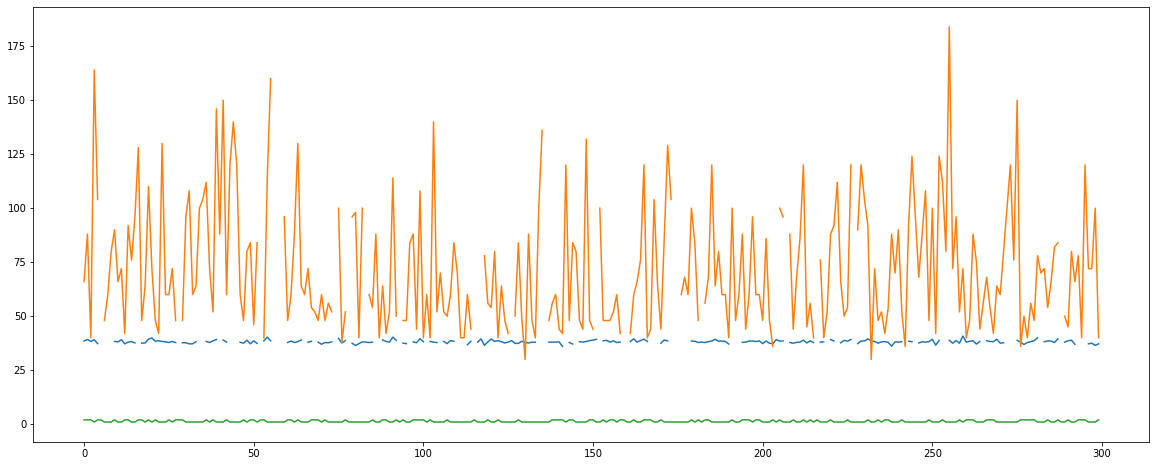

In [66]:
rcParams['figure.figsize'] = 20, 8

dataframe = read_csv(url, header=None, na_values='?')
plt.plot(dataframe.values[:,3])
plt.plot(dataframe.values[:,4])
plt.plot(dataframe.values[:,23])
plt.show()

In [31]:
# Return a Numpy representation of the DataFrame
data = dataframe.values

# Get all columns except column 23 (lived or died)
ix = [i for i in range(data.shape[1]) if i != 23]

# split into input and output elements. all rows, y <= column.23
X, y = data[:, ix], data[:, 23]

In [32]:
# print total missinginto independent column
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


In [33]:
# print total missing into dependent column
print('Missing: %d' % sum(isnan(y).flatten()))

Missing: 0


In [71]:
# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


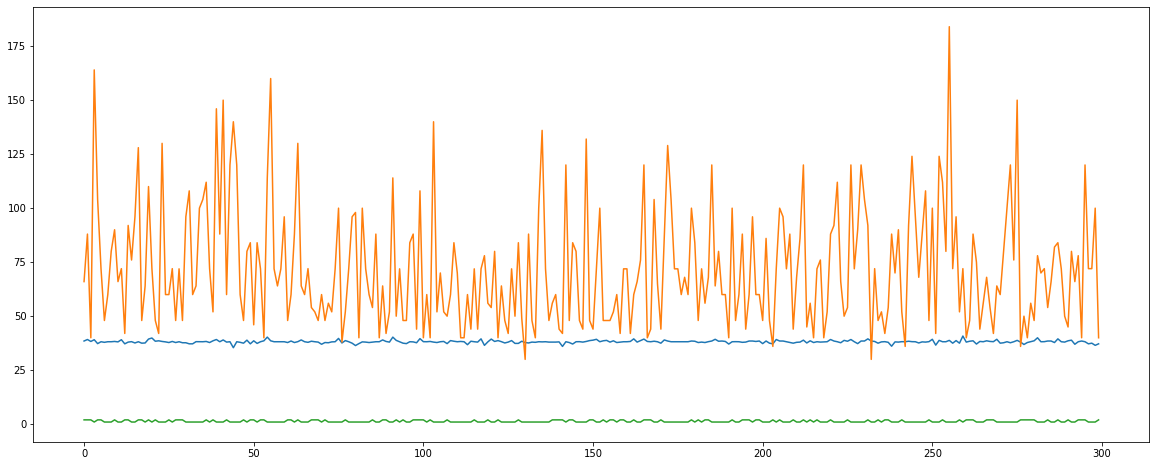

In [72]:
rcParams['figure.figsize'] = 20, 8
plt.plot(Xtrans[:,3])
plt.plot(Xtrans[:,4])
plt.plot(dataframe.values[:,23])
plt.show()